In [1]:
from datasets import load_dataset
import numpy as np
import pandas as pd
dataset = load_dataset("ai4privacy/pii-masking-300k")
train = load_dataset("ai4privacy/pii-masking-300k", split = "train")
test = load_dataset("ai4privacy/pii-masking-300k", split = "validation")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/train/1english_openpii_30k.jsonl:   0%|          | 0.00/103M [00:00<?, ?B/s]

data/train/dutch_openpii_28k.jsonl:   0%|          | 0.00/102M [00:00<?, ?B/s]

data/train/french_openpii_31k.jsonl:   0%|          | 0.00/114M [00:00<?, ?B/s]

data/train/german_openpii_30k.jsonl:   0%|          | 0.00/108M [00:00<?, ?B/s]

data/train/italian_openpii_29k.jsonl:   0%|          | 0.00/104M [00:00<?, ?B/s]

data/train/spanish_openpii_29k.jsonl:   0%|          | 0.00/102M [00:00<?, ?B/s]

data/validation/1english_openpii_8k.json(…):   0%|          | 0.00/27.3M [00:00<?, ?B/s]

data/validation/dutch_openpii_7k.jsonl:   0%|          | 0.00/27.0M [00:00<?, ?B/s]

data/validation/french_openpii_8k.jsonl:   0%|          | 0.00/30.7M [00:00<?, ?B/s]

data/validation/german_openpii_8k.jsonl:   0%|          | 0.00/29.2M [00:00<?, ?B/s]

data/validation/italian_openpiii_8k.json(…):   0%|          | 0.00/28.3M [00:00<?, ?B/s]

data/validation/spanish_openpii_8k.jsonl:   0%|          | 0.00/27.7M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/177677 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/47728 [00:00<?, ? examples/s]

In [2]:
# basic information
print(dataset)
print(train)
print(test)
print(train.column_names)

DatasetDict({
    train: Dataset({
        features: ['source_text', 'target_text', 'privacy_mask', 'span_labels', 'mbert_text_tokens', 'mbert_bio_labels', 'id', 'language', 'set'],
        num_rows: 177677
    })
    validation: Dataset({
        features: ['source_text', 'target_text', 'privacy_mask', 'span_labels', 'mbert_text_tokens', 'mbert_bio_labels', 'id', 'language', 'set'],
        num_rows: 47728
    })
})
Dataset({
    features: ['source_text', 'target_text', 'privacy_mask', 'span_labels', 'mbert_text_tokens', 'mbert_bio_labels', 'id', 'language', 'set'],
    num_rows: 177677
})
Dataset({
    features: ['source_text', 'target_text', 'privacy_mask', 'span_labels', 'mbert_text_tokens', 'mbert_bio_labels', 'id', 'language', 'set'],
    num_rows: 47728
})
['source_text', 'target_text', 'privacy_mask', 'span_labels', 'mbert_text_tokens', 'mbert_bio_labels', 'id', 'language', 'set']


In [3]:
# looking at features for training data and removing any data that isn't of the English language
print(train.features)
print(train.unique("language"))
train = train.filter(lambda x: x["language"] == "English")
print(train)
print(train["language"][:10])

{'source_text': Value('string'), 'target_text': Value('string'), 'privacy_mask': List({'value': Value('string'), 'start': Value('int64'), 'end': Value('int64'), 'label': Value('string')}), 'span_labels': Value('string'), 'mbert_text_tokens': List(Value('string')), 'mbert_bio_labels': List(Value('string')), 'id': Value('string'), 'language': Value('string'), 'set': Value('string')}
['English', 'Dutch', 'French', 'German', 'Italian', 'Spanish']


Filter:   0%|          | 0/177677 [00:00<?, ? examples/s]

Dataset({
    features: ['source_text', 'target_text', 'privacy_mask', 'span_labels', 'mbert_text_tokens', 'mbert_bio_labels', 'id', 'language', 'set'],
    num_rows: 29908
})
['English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English']


In [4]:
# basic info
# length of training went from 177677 to 29908
print(train.unique("language"))
print(train)

Flattening the indices:   0%|          | 0/29908 [00:00<?, ? examples/s]

['English']
Dataset({
    features: ['source_text', 'target_text', 'privacy_mask', 'span_labels', 'mbert_text_tokens', 'mbert_bio_labels', 'id', 'language', 'set'],
    num_rows: 29908
})


In [5]:
# looking at features for testing data and removing any data that isn't of the English language
print(test.features)
print(test.unique("language"))
test = test.filter(lambda x: x["language"] == "English")

{'source_text': Value('string'), 'target_text': Value('string'), 'privacy_mask': List({'value': Value('string'), 'start': Value('int64'), 'end': Value('int64'), 'label': Value('string')}), 'span_labels': Value('string'), 'mbert_text_tokens': List(Value('string')), 'mbert_bio_labels': List(Value('string')), 'id': Value('string'), 'language': Value('string'), 'set': Value('string')}
['English', 'Dutch', 'French', 'German', 'Italian', 'Spanish']


Filter:   0%|          | 0/47728 [00:00<?, ? examples/s]

In [6]:
# basic info
# length of testing went from 47728 to 7946
print(test.unique("language"))
print(test)

Flattening the indices:   0%|          | 0/7946 [00:00<?, ? examples/s]

['English']
Dataset({
    features: ['source_text', 'target_text', 'privacy_mask', 'span_labels', 'mbert_text_tokens', 'mbert_bio_labels', 'id', 'language', 'set'],
    num_rows: 7946
})


In [7]:
# for manually inspecting a few sample datapoints
for i in range(5):
    sample = train[i]
    print("Source:", sample["source_text"])
    print("Spans:", sample["privacy_mask"], sample["span_labels"])
    print("Target:", sample["target_text"])
    print("\n---------------------------------\n")

Source: Subject: Group Messaging for Admissions Process

Good morning, everyone,

I hope this message finds you well. As we continue our admissions processes, I would like to update you on the latest developments and key information. Please find below the timeline for our upcoming meetings:

- wynqvrh053 - Meeting at 10:20am
- luka.burg - Meeting at 21
- qahil.wittauer - Meeting at quarter past 13
- gholamhossein.ruschke - Meeting at 9:47 PM
- pdmjrsyoz1460 
Spans: [{'value': 'wynqvrh053', 'start': 287, 'end': 297, 'label': 'USERNAME'}, {'value': '10:20am', 'start': 311, 'end': 318, 'label': 'TIME'}, {'value': 'luka.burg', 'start': 321, 'end': 330, 'label': 'USERNAME'}, {'value': '21', 'start': 344, 'end': 346, 'label': 'TIME'}, {'value': 'qahil.wittauer', 'start': 349, 'end': 363, 'label': 'USERNAME'}, {'value': 'quarter past 13', 'start': 377, 'end': 392, 'label': 'TIME'}, {'value': 'gholamhossein.ruschke', 'start': 395, 'end': 416, 'label': 'USERNAME'}, {'value': '9:47 PM', 'start':

In [8]:
train_df = pd.DataFrame(train)
train_df.head()

test_df = pd.DataFrame(test)
test_df.head()

,source_text,target_text,privacy_mask,span_labels,mbert_text_tokens,mbert_bio_labels,id,language,set
0,On the video sharing platform for educational ...,On the video sharing platform for educational ...,"[{'value': 'paaltwvkjuijwbj957', 'start': 165,...","[[316, 320, ""USERNAME""], [254, 272, ""USERNAME""...","[On, the, video, sharing, platform, for, educa...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",40770A,English,validation
1,d wsfdkmi9214 shared personal experiences rela...,d [USERNAME] shared personal experiences relat...,"[{'value': 'wsfdkmi9214', 'start': 2, 'end': 1...","[[355, 356, ""USERNAME""], [339, 350, ""USERNAME""...","[d, w, ##s, ##f, ##d, ##km, ##i, ##9, ##21, ##...","[O, B-USERNAME, I-USERNAME, I-USERNAME, I-USER...",40770B,English,validation
2,ach other respectfully in their comments. yega...,ach other respectfully in their comments. [USE...,"[{'value': 'yeganeh-afchar', 'start': 42, 'end...","[[339, 344, ""TIME""], [61, 74, ""USERNAME""], [42...","[ach, other, respect, ##fully, in, their, comm...","[O, O, O, O, O, O, O, O, B-USERNAME, I-USERNAM...",40770C,English,validation
3,"{\n ""Guidelines"": {\n ""maximumAge"": ""May 5...","{\n ""Guidelines"": {\n ""maximumAge"": ""[BOD]...","[{'value': 'May 5th, 1966', 'start': 39, 'end'...","[[432, 441, ""IDCARD""], [391, 400, ""IDCARD""], [...","[{, "", Guide, ##lines, "", :, {, "", maximum, ##...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",40771,English,validation
4,Subject: Collaboration Opportunity in Online C...,Subject: Collaboration Opportunity in Online C...,[],[],"[Sub, ##ject, :, Coll, ##aboration, Op, ##port...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",40779A,English,validation


In [9]:
# checking for any missing values
train_df.isnull().sum()

,0
source_text,0
target_text,0
privacy_mask,0
span_labels,0
mbert_text_tokens,0
mbert_bio_labels,0
id,0
language,0
set,0


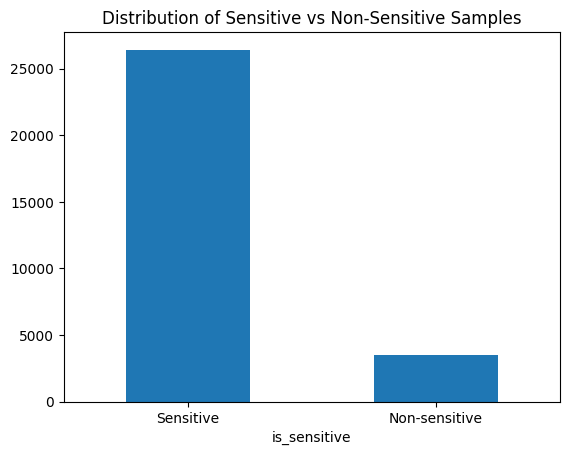

In [10]:
# transform data so it's binary
train_df["is_sensitive"] = train_df["privacy_mask"].apply(lambda x: 1 if len(x) > 0 else 0)
test_df["is_sensitive"] = test_df["privacy_mask"].apply(lambda x: 1 if len(x) > 0 else 0)

import matplotlib.pyplot as plt

train_df["is_sensitive"].value_counts().plot(kind = "bar")
plt.title("Distribution of Sensitive vs Non-Sensitive Samples")
plt.xticks([0,1], ["Sensitive", "Non-sensitive"], rotation = 0)
plt.show()


In [11]:
# saving dataset

from google.colab import drive
drive.mount('/content/drive')
save_path = "/content/drive/My Drive/CMPE 257/CMPE 257 Colab/257 Sensitive Data Input Guardrail/"

train_df.to_pickle(save_path + "train_df.pkl")
test_df.to_pickle(save_path + "test_df.pkl")

Mounted at /content/drive


In [12]:
train_df = pd.read_pickle("/content/drive/My Drive/CMPE 257/CMPE 257 Colab/257 Sensitive Data Input Guardrail/train_df.pkl")
test_df = pd.read_pickle("/content/drive/My Drive/CMPE 257/CMPE 257 Colab/257 Sensitive Data Input Guardrail/test_df.pkl")
